In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

# TODOs (from 09.06.2020)

1. Strip away the non-useful functions
2. Document the remaining functions
3. Move the remaining functions to modules
4. Test the modules
5. Clean up this NB

In [6]:
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

In [7]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [8]:
eps = 0.25

In [10]:
rand_range = lambda size, max_, min_: (max_-min_)*np.random.random_sample(size=size) + min_

In [123]:
from synthetic_data.trajectory import get_stay
from synthetic_data.trajectory import get_journey_path, get_segments
from synthetic_data.masking import get_mask_with_duplicates
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays, get_stay_indices
from synthetic_data.noise import get_noisy_segs, get_noisy_path, get_noise_arr
from synthetic_data.noise import get_noisy_segs, get_noisy_path, get_noise_arr

In [12]:
from synthetic_data.trajectory_class import get_trajectory

In [13]:
dsec = 1/3600.0
time = np.arange(0,24,dsec)

In [14]:
segs_plot_kwargs = {'linestyle':'--', 'marker':'o', 'color':'k', 'linewidth':4.0, 'markerfacecolor':'w', 'markersize':6.0, 'markeredgewidth':2.0}

In [15]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [324]:
event_frac = rand_range(1,0.01,0.001)[0]

duplicate_frac = rand_range(1,0.3,0.05)[0]

print(event_frac, duplicate_frac)

configs = {
    'threshold':0.5,
    'event_frac':event_frac,
    'duplicate_frac':duplicate_frac,    
    'noise_min':0.02,
    'noise_max':0.15
}


nr_stays = np.random.randint(10)
stay_time_bounds = np.concatenate((np.array([0]),rand_range(2*nr_stays, 24, 0),np.array([24])))
stay_time_bounds = np.sort(stay_time_bounds)
stay_xlocs = rand_range(nr_stays+1, 2, - 2.0)

stays = []
for n in range(nr_stays+1):
    
    nn = 2*n
    stay = get_stay(stay_time_bounds[nn], stay_time_bounds[nn+1],  stay_xlocs[n])
    #print(n,nn,nn+1,stay)
    stays.append(stay)
    

time_sub, raw_journey_sub, noise_journey_sub = get_trajectory(stays, time, configs)

segments = get_segments(time, stays, threshold=0.5)
new_stays = get_adjusted_stays(segments, time_sub)
new_t_segs, new_x_segs = get_stay_segs(new_stays) 

0.005118232663133368 0.14143525640861476


/home/sandm/Notebooks/stay_classification/src/synthetic_data/trajectory.py:162: UserWarning: the distance between the consecutive locations is within the threshold 0.5
  warnings.warn(f"the distance between the consecutive locations is within the threshold {threshold}")


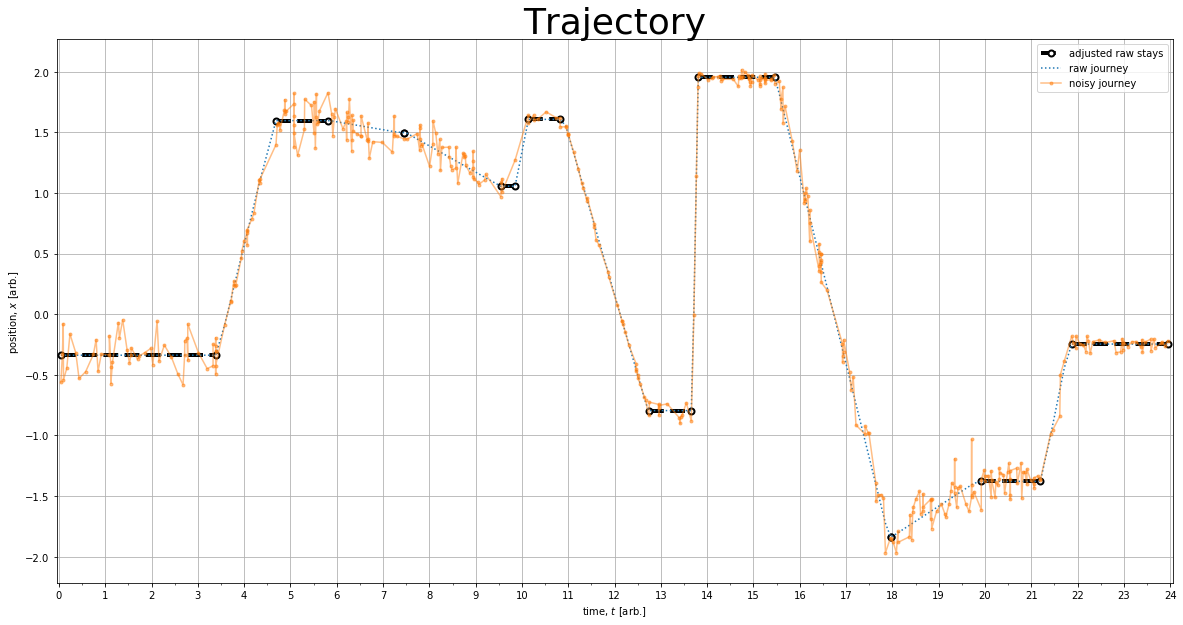

In [325]:
plt.figure(figsize=(20,10))
#plt.plot(t_segs, x_segs, ':', marker='|', color='grey', linewidth=2.0, markerfacecolor='w', markersize=30.0, markeredgewidth=1.0, dashes=[0.5,0.5], label='raw stays')

plt.plot(new_t_segs, new_x_segs, **segs_plot_kwargs, label='adjusted raw stays')
plt.plot(time_sub, raw_journey_sub, ':', label='raw journey')
plt.plot(time_sub, noise_journey_sub, '.-', label='noisy journey', alpha=0.5)

plt.legend();

plt.xlabel(r'time, $t$ [arb.]')
plt.ylabel(r'position, $x$ [arb.]')

ymin = noise_journey_sub.min()-1*eps
ymax = noise_journey_sub.max()+1*eps
plt.ylim(ymin, ymax)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

plt.xlim(-0.05, 24.05)
#plt.xlim(-0.1, 19.1
#plt.xlim(15.1, 19.1)

plt.title('Trajectory', fontsize=36)
plt.grid(visible=True);

### Check the trajectory

In [504]:
time_thresh = 1/6 # 10 mins

In [551]:
alt_stay_time_bounds = []
alt_stay_xlocs = []
for n in range(len(stay_xlocs)):
    
    nn = 2*n
    b0,b1 = stay_time_bounds[nn],stay_time_bounds[nn+1]

    if b1-b0 > time_thresh: 
        
        alt_stay_time_bounds.extend([b0,b1])
        alt_stay_xlocs.append(stay_xlocs[n])
    else:
        print('skip',n)

    #print(alt_stay_time_bounds)

skip 2
skip 7


In [542]:
len(stay_time_bounds),len(alt_stay_time_bounds)

(20, 16)

In [553]:
configs = {
    'threshold':0.5,
    'event_frac':event_frac,
    'duplicate_frac':duplicate_frac,    
    'noise_min':0.02,
    'noise_max':0.15
}


alt_stays = []
for n in range(int(len(alt_stay_time_bounds)/2)):
    
    nn = 2*n
    stay = get_stay(alt_stay_time_bounds[nn], alt_stay_time_bounds[nn+1],  alt_stay_xlocs[n])
    #print(n,nn,nn+1,stay)
    alt_stays.append(stay)
    

In [554]:
alt_time_sub, alt_raw_journey_sub, alt_noise_journey_sub = get_trajectory(alt_stays, time, configs)

In [555]:
alt_segments = get_segments(time, alt_stays, threshold=0.5)

In [556]:
alt_new_stays = get_adjusted_stays(alt_segments, alt_time_sub)
alt_new_t_segs, alt_new_x_segs = get_stay_segs(alt_new_stays) 

#### Plot new vs old

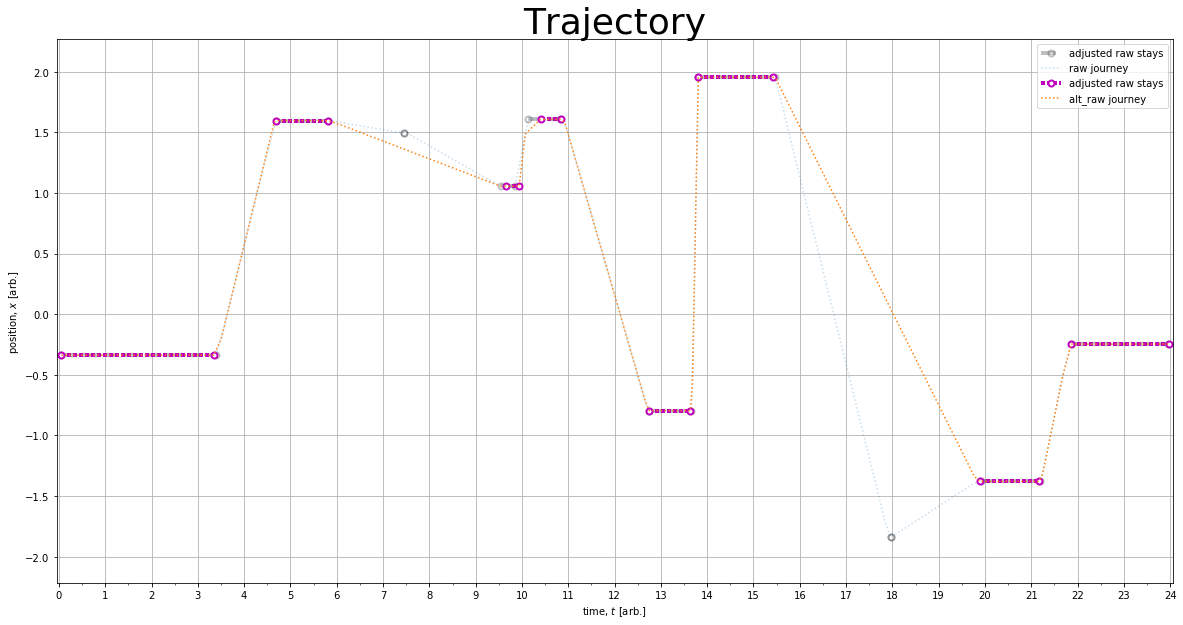

In [560]:
plt.figure(figsize=(20,10))
#plt.plot(t_segs, x_segs, ':', marker='|', color='grey', linewidth=2.0, markerfacecolor='w', markersize=30.0, markeredgewidth=1.0, dashes=[0.5,0.5], label='raw stays')

plt.plot(new_t_segs, new_x_segs, **segs_plot_kwargs, label='adjusted raw stays', alpha=0.25)
plt.plot(time_sub, raw_journey_sub, ':', label='raw journey', alpha=0.25)
#plt.plot(time_sub, noise_journey_sub, '.-', label='noisy journey', alpha=0.25)

alt_segs_plot_kwargs = segs_plot_kwargs.copy()
alt_segs_plot_kwargs['color'] = 'm'
alt_segs_plot_kwargs['dashes'] = [1,0.5]
plt.plot(alt_new_t_segs, alt_new_x_segs, **alt_segs_plot_kwargs, label='adjusted raw stays')
plt.plot(alt_time_sub, alt_raw_journey_sub, ':', label='alt_raw journey')
#plt.plot(alt_time_sub, alt_noise_journey_sub, '.-', label='alt_noisy journey', alpha=0.5)

plt.legend();

plt.xlabel(r'time, $t$ [arb.]')
plt.ylabel(r'position, $x$ [arb.]')

ymin = noise_journey_sub.min()-1*eps
ymax = noise_journey_sub.max()+1*eps
plt.ylim(ymin, ymax)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))

plt.xlim(-0.05, 24.05)
#plt.xlim(-0.1, 19.1
#plt.xlim(15.1, 19.1)

plt.title('Trajectory', fontsize=36)
plt.grid(visible=True);

### Save the trajectory

In [471]:
trajectory = {}

trajectory['segments'] = segments
trajectory['time_arr'] = time_sub
trajectory['raw_locs_arr'] = raw_journey_sub
trajectory['nse_locs_arr'] = noise_journey_sub

In [474]:
import pickle

In [477]:
from datetime import datetime

In [493]:
date_tag = datetime.today().strftime("%Y%m%d")
len_tag = str(len(new_stays))
trajectory_tag = f'{date_tag}_trajectory_{len_tag}stays.pkl' 
print(trajectory_tag)

20200625_trajectory_10stays.pkl


In [494]:
pickle.dump( trajectory, open( trajectory_tag, "wb" ) )
#trajectory = pickle.load( open( "save.p", "rb" ) )